## Training a word2vec model from scratch

-- Prof. Dorien Herremans

This lab consists of 2 parts, training a word2vec model from scratch, and leveraging pretrained models (different notebook). 

In this notebook, will start by training a word2vec model from scratch using the gensim library. You will need to ensure that you have gensim installed, and a file decompressor to load our dataset. 

Note: these models may take a while to train. Be sure to switch the runtime of  Google Colab to us a GPU hardware accellerator (in the menu at the top). 

Let's start by installing some libraries that we will use, you may not need this when using Colab. 

In [ ]:
#STUDENT NUMBER: 1004429

#....

In [ ]:
!pip install gensim
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=27cbafc6e7731f7b892b6083872e0f8a2cbafe929e5d4a4fc7a3c64fee0100eb
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


Now we can import libraries that we will use today. `wget` for downloading our dataset and `gensim` for our embedding models:

In [ ]:
# imports 
import gensim 
import wget

We will train our model using a very small dataset for demonstrative purposes. Note that for a real data science project you should train on a much larger dataset, and ensure that the language used in the training dataset matches the language of your task, e.g. financial lingo, social networking lingo, etc. 

We will use the complete works of Shakespeare to train our word2vec network. You can find the dataset file at https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt

In [ ]:
# download the dataset
wget.download("https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt")

'shakespeare.txt'

How does this file look? 

In [ ]:
!head -50 shakespeare.txt

1609

THE SONNETS

by William Shakespeare



                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bud buriest thy content,
  And tender churl mak'st waste in niggarding:
    Pity the world, or else this glutton be,
    To eat the world's due, by the grave and thee.


                     2
  When forty winters shall besiege thy brow,
  And dig deep trenches in thy beauty's field,
  Thy youth's proud livery so gazed on now,
  Will be a tattered weed of small worth held:  
  Then being asked, where all thy beauty lies,
  Where all the treasure of thy l

Let's read the input file and convert each line into a list of words (tokenizing). Do do this, we create a function read_input which is called in the penultimate line below: 

In [ ]:
def read_input(input_file):
    
    print("reading file...")
      
    with open (input_file, 'r') as f:   
        lines = f.readlines()
        for line in lines:
            # do some pre-processing and return a (tokenized) list 
            # of words for each review text
            # you can print the output here to understand 
            # the preprocessing (tokenizing)
            yield gensim.utils.simple_preprocess (line)

# each review item new becomes a series of words
# this is a list of lists

# point to the location on your filesystem
data_file = 'shakespeare.txt'

documents = list (read_input (data_file))
print("Done reading data file")

reading file...
Done reading data file


These are the resulting tokenlists: 

In [ ]:
documents

[[],
 [],
 ['the', 'sonnets'],
 [],
 ['by', 'william', 'shakespeare'],
 [],
 [],
 [],
 [],
 ['from', 'fairest', 'creatures', 'we', 'desire', 'increase'],
 ['that', 'thereby', 'beauty', 'rose', 'might', 'never', 'die'],
 ['but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease'],
 ['his', 'tender', 'heir', 'might', 'bear', 'his', 'memory'],
 ['but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes'],
 ['feed',
  'st',
  'thy',
  'light',
  'flame',
  'with',
  'self',
  'substantial',
  'fuel'],
 ['making', 'famine', 'where', 'abundance', 'lies'],
 ['thy', 'self', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel'],
 ['thou', 'that', 'art', 'now', 'the', 'world', 'fresh', 'ornament'],
 ['and', 'only', 'herald', 'to', 'the', 'gaudy', 'spring'],
 ['within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content'],
 ['and', 'tender', 'churl', 'mak', 'st', 'waste', 'in', 'niggarding'],
 ['pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be'],
 ['to', 'eat', 'the'

Now let's train the word2vec model using our `document` variable (which is a list of word lists). Note that you can specify a number of hyperparameters below:
* `min_count` removes all words that occur less then `min_count`.
* `window`: window size in the skip-gram.
* `workers`: how many threads to use when building the model.
* `size`: number of dimension of your new word embedding vector (typically 100-200). Smaller datasets require a smaller number.



In [ ]:
model = gensim.models.Word2Vec (documents, size=150, window=5, min_count=2, workers=4)
model.train(documents,total_examples=len(documents),epochs=10)

(6704377, 8675160)

That's it! Now you've trained the model! 

Now let's explore some properties of our new word space. You can get the words most close (read:  most similar) to a given word. Remember, the only texts the model has seen are from shakespeare!

Which word is most similar to king? (closest distance)?

In [ ]:
w1 = "king"
model.wv.most_similar (positive=w1)

[('prince', 0.6652935743331909),
 ('duke', 0.5939123034477234),
 ('plantagenets', 0.5561361312866211),
 ('fifth', 0.5506486892700195),
 ('sixth', 0.5292608737945557),
 ('bolingbroke', 0.5253151059150696),
 ('warwick', 0.5232229828834534),
 ('ghost', 0.52081298828125),
 ('bastard', 0.49496445059776306),
 ('emperor', 0.49407288432121277)]

'prince' is the word most similar to 'king'.

## Exercises

Look up the top 6 words similar to 'smile', you can use the parameter: `topn=6`


In [ ]:
# look up top 6 words similar to 'smile'
w1 = "smile"
model.wv.most_similar (positive=w1, topn=6)

[('laugh', 0.7518905401229858),
 ('rejoice', 0.7010419368743896),
 ('grieve', 0.6988614201545715),
 ('weep', 0.6933470368385315),
 ('tremble', 0.6839522123336792),
 ('lodge', 0.6662959456443787)]

Look up the top 6 words similar to 'france':

In [ ]:
# look up top 6 words similar to 'france'
w1 = "france"
model.wv.most_similar (positive=w1, topn=6)

[('england', 0.6537896990776062),
 ('kings', 0.5640894770622253),
 ('greece', 0.561575174331665),
 ('princess', 0.5553180575370789),
 ('wales', 0.5418078899383545),
 ('york', 0.5408989191055298)]

Look up the top 6 words similar to 'sword':

In [ ]:
# look up top 6 words similar to 'sword'
w1 = "sword"
model.wv.most_similar (positive=w1, topn=6)

[('head', 0.7558639645576477),
 ('throat', 0.7058186531066895),
 ('knife', 0.6941626071929932),
 ('pocket', 0.6859979629516602),
 ('weapon', 0.6840521097183228),
 ('neck', 0.6816881895065308)]

Get everything related to royalty and not to 'farmer', you can use the parameter `negative`

In [ ]:
w1 = ["king",'queen','prince']
w2 = ['farmer']
#TODO
model.wv.most_similar (positive=w1, negative=w2)

[('duke', 0.6028634905815125),
 ('princess', 0.5949580073356628),
 ('warwick', 0.5399255156517029),
 ('comfort', 0.5376219749450684),
 ('emperor', 0.527888834476471),
 ('cousin', 0.5093767046928406),
 ('cause', 0.5049532055854797),
 ('ghost', 0.5039550065994263),
 ('issue', 0.5009514689445496),
 ('bolingbroke', 0.4947788417339325)]

Explore the similarity (e.g. distance) between two words. Does the result make sense to you?

In [ ]:
# similarity between two similar words
model.wv.similarity(w1="pretty",w2="beautiful")

0.58888835

In [ ]:
# similarity between two opposing words: king and farmer. Does it make sense? 
model.wv.similarity(w1="king",w2="farmer")

0.022933412

Yes it make sense. 'king' and 'farmer' are opposing words and we should expect a low similarity score. 'pretty' and 'beautiful' are similar words and we should expect a higher similarity score.

Try some other combinations :) 

We can even use it to perform more 'smart'/ IQ test type assigments. Which word in this list does not belong? 

In [ ]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'france'

If you are interested in plotting the words in a multidimensional space, you can actually get the vector coordinates (word embeddings) of each word: 

In [ ]:
model.wv['france']

array([ 0.19065326, -0.22878143,  0.11213642,  0.34390667, -1.1063694 ,
        0.30633855,  0.48658967,  1.0378908 , -1.2791333 , -0.28961763,
        0.63442224, -0.8575129 ,  0.7820055 ,  0.22009084,  1.209749  ,
        0.0355038 , -1.6108968 , -0.18575105,  0.06752434, -0.15262435,
        0.24524768, -0.40977293, -0.71282923, -0.41986057,  0.7917967 ,
       -0.17486863, -0.81835574,  0.5008428 ,  0.29491892, -0.5724402 ,
       -0.6365663 ,  0.4398009 , -0.9194955 , -0.64574504, -0.32814527,
       -0.4529526 , -0.1011496 , -0.254214  ,  0.41680646,  0.9620872 ,
        0.08817741,  0.7041962 ,  0.34247175, -0.13622598,  1.2385709 ,
        0.52853006,  1.2810494 ,  0.3376334 ,  1.5249943 , -0.4704515 ,
        0.5116277 ,  0.20843168,  0.99656194,  0.8050206 , -0.0922344 ,
       -0.6865827 , -0.50869244,  0.15822612, -0.20001192,  0.81847876,
       -1.9688779 ,  0.55490196,  0.5285631 , -0.01200356,  0.0869021 ,
        0.06679874,  0.5640108 , -1.0345786 ,  0.13138226,  1.68

## Visualising our trained word2vec model using t-SNE: 

Below we visualise the first 100 words of our vocabulary in a 2D t-SNE projection. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


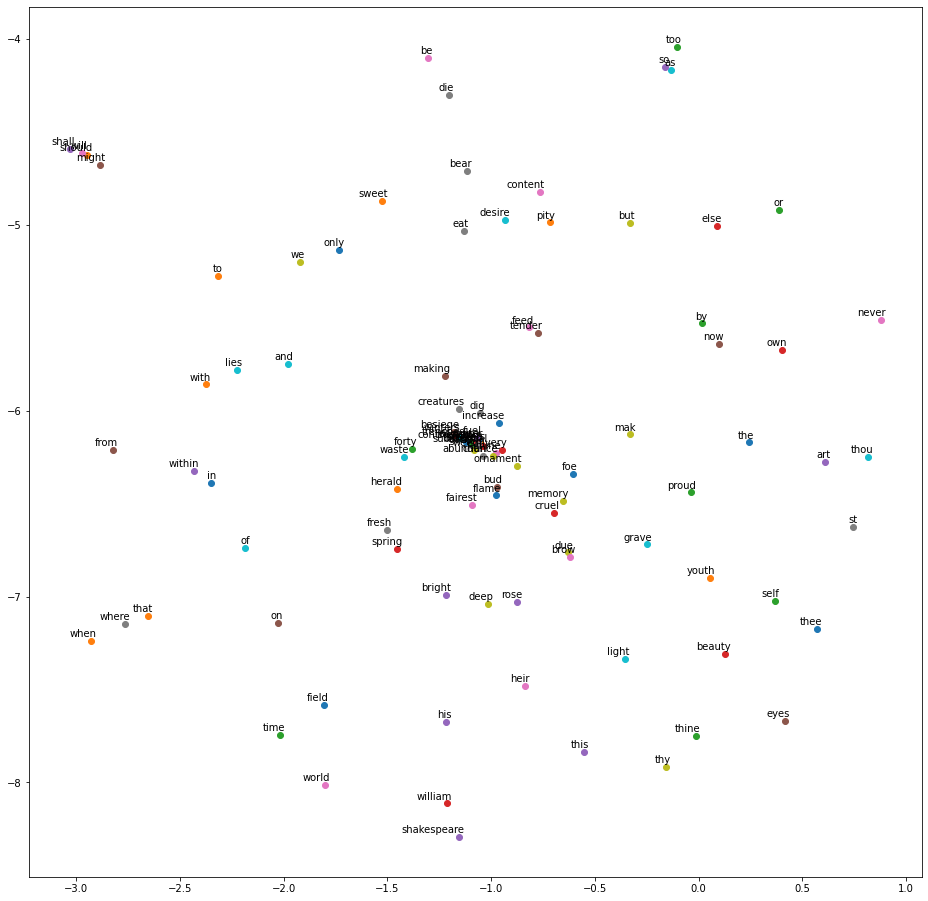

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    
#     fyi: to test specific labels instead of all the words in the vocab: 
#     labels = ['king', 'queen', 'prince', 'farmer', 'blue', 'red']
#     tokens = []
#     for label in labels: 
#         tokens.append(model[label])

    labels = []
    tokens = []
    

    # to speed up the process, let's limit to the first 100 elements
    count = 0
    for word in model.wv.vocab:
        if count < 100:
            # store the word embeddings of the words 
            tokens.append(model[word])
            # keep track of the labels too so that we can plot it in the graph below
            labels.append(word)
            count = count+1

    # define the parameters of the tsne model
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    
    # for the embeddings of our tokes to the tsne model
    new_values = tsne_model.fit_transform(tokens)


    # Now let's plot the tsne projects for each of the tokens in 2D
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(model)

## References

* https://radimrehurek.com/gensim/models/word2vec.html
* https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
* https://github.com/kavgan/nlp-text-mining-working-examples/tree/master/word2vec
* https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5